# Data Input and Cleaning

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/gdrive/MyDrive/Energy Consumption dataset/household_power_consumption.txt", sep=";")
df.head()

/tmp/ipython-input-452870955.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/gdrive/MyDrive/Energy Consumption dataset/household_power_consumption.txt", sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
#saving the dataframe as csv
df.to_csv('household_power_consumption.csv', index=False)

In [ ]:
df = pd.read_csv('household_power_consumption.csv', sep=',',
                 low_memory=False, na_values=['nan','?']
                 )

df['dt'] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('dt')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [ ]:
df.shape

(2075259, 7)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
df = df.ffill()

In [ ]:
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


# Data Visualization

In [ ]:
!pip install np_utils

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import Dropout

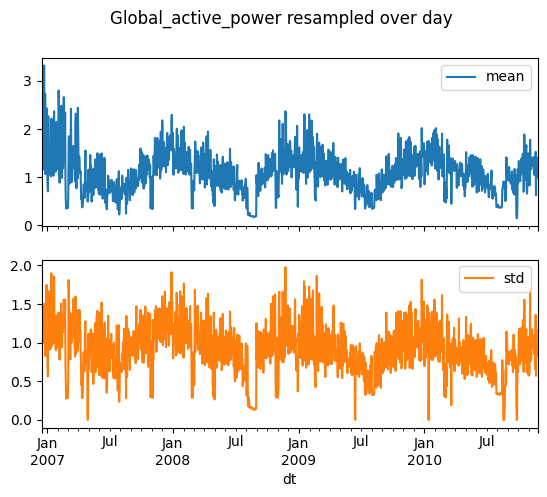

In [ ]:
r = df.Global_active_power.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_active_power resampled over day')
plt.show()


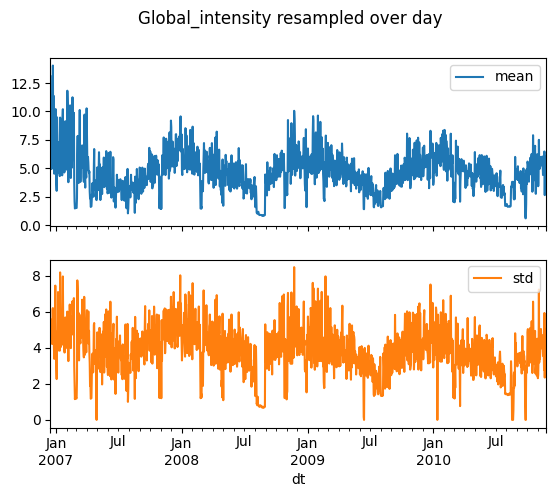

In [ ]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()


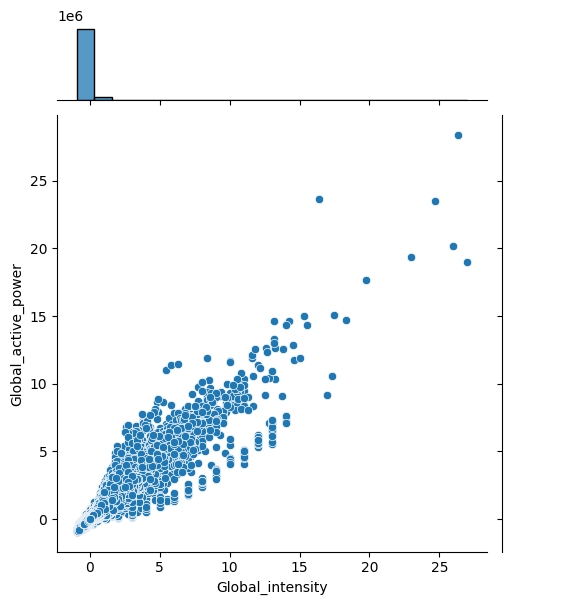

In [ ]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)

plt.show()

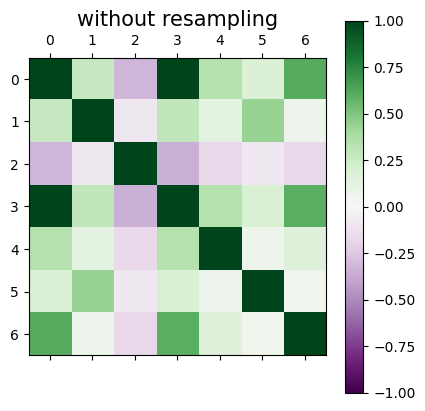

/tmp/ipython-input-1486100805.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
/tmp/ipython-input-1486100805.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')


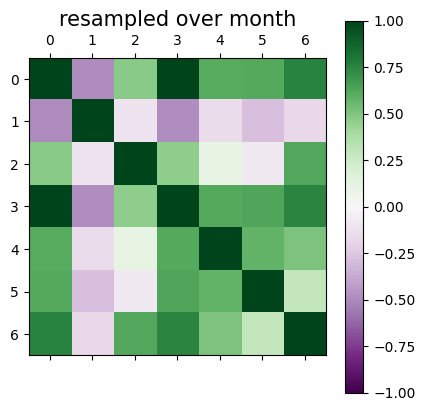

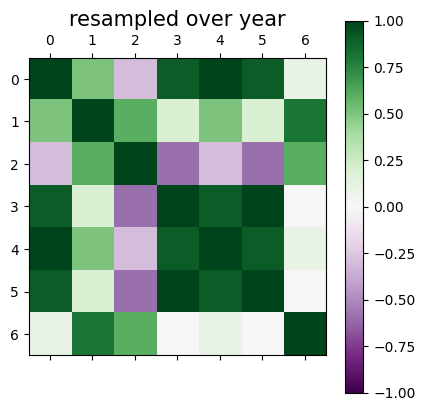

In [ ]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

In [ ]:
for i, col in enumerate(df.columns.to_list()):
  print(i, "->", col)

0 -> Global_active_power
1 -> Global_reactive_power
2 -> Voltage
3 -> Global_intensity
4 -> Sub_metering_1
5 -> Sub_metering_2
6 -> Sub_metering_3


# Implementation of Different Models

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [ ]:
# resampling it over Hour to reduce the computation
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [ ]:
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
# Create a new dataframe with 'dt' and 'Global_active_power'
df_new = df_resample[['Global_active_power']].copy()

# Extract time features from 'dt'
df_new['hour'] = df_new.index.hour
df_new['day'] = df_new.index.day
df_new['month'] = df_new.index.month

# Reorder columns to have 'Global_active_power' at the end
cols = list(df_new.columns)
cols.remove('Global_active_power')
cols.append('Global_active_power')
df_new = df_new[cols]

df_new.head()

,hour,day,month,Global_active_power
dt,,,,
2006-12-16 17:00:00,17,16,12,4.222889
2006-12-16 18:00:00,18,16,12,3.632200
2006-12-16 19:00:00,19,16,12,3.400233
2006-12-16 20:00:00,20,16,12,3.268567
2006-12-16 21:00:00,21,16,12,3.056467


In [ ]:
# Taking 2 years as train data, and rest as test data
n_train_time = 365*24*2

# split into train and test sets
values_new = df_new.values

train_new = values_new[:n_train_time, :]
test_new = values_new[n_train_time:, :]

# split into input and outputs
# last value is the target
train_new_X, train_new_y = train_new[:, :-1], train_new[:, -1]
test_new_X, test_new_y = test_new[:, :-1], test_new[:, -1]

print(train_new_X.shape, train_new_y.shape, test_new_X.shape, test_new_y.shape)

(17520, 3) (17520,) (17069, 3) (17069,)


In [ ]:
values = df_resample.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1, 1)

# Drop the specified columns from the reframed DataFrame
reframed = reframed.drop(columns=['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)', 'var7(t)'])

reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555


In [ ]:
# Taking 2 years as train data, and rest as test data
n_train_time = 365*24*2

# split into train and test sets
values = reframed.values

train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
# last value is the target
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17520, 7) (17520,) (17068, 7) (17068,)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

lr_model.fit(train_new_X, train_new_y)

pred_y = lr_model.predict(test_new_X)

mse = mean_squared_error(test_new_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_new_y, pred_y)
accuracy_percent = r2 * 100  # Convert R² to percentage

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Prediction Accuracy (approx.): {accuracy_percent:.2f}%")



Model Evaluation Metrics:
Mean Squared Error (MSE): 0.5950
Root Mean Squared Error (RMSE): 0.7714
R² Score: 0.1031
Prediction Accuracy (approx.): 10.31%


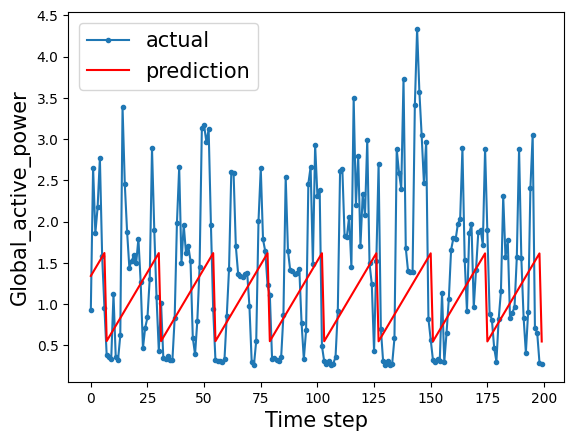

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, test_new_y[:200], marker='.', label="actual")
plt.plot(aa, pred_y[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

Linear Regression isn’t enough: very low R² (~0.1031). Energy usage has non-linear, time-dependent patterns (peaks in evenings, appliance usage, weekday/weekend effects) that a straight-line model can’t capture.


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Linear Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(train_new_X, train_new_y)

pred_y = rf_model.predict(test_new_X)

mse = mean_squared_error(test_new_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_new_y, pred_y)
accuracy_percent = r2 * 100  # Convert R² to percentage

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Prediction Accuracy (approx.): {accuracy_percent:.2f}%")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.6945
Root Mean Squared Error (RMSE): 0.8334
R² Score: -0.0468
Prediction Accuracy (approx.): -4.68%


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Linear Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model.fit(train_new_X, train_new_y)

pred_y = rf_model.predict(test_new_X)

mse = mean_squared_error(test_new_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_new_y, pred_y)
accuracy_percent = r2 * 100  # Convert R² to percentage

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Prediction Accuracy (approx.): {accuracy_percent:.2f}%")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.6945
Root Mean Squared Error (RMSE): 0.8334
R² Score: -0.0468
Prediction Accuracy (approx.): -4.68%


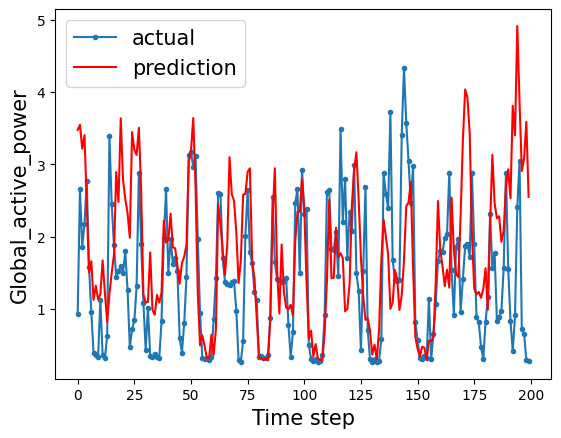

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, test_new_y[:200], marker='.', label="actual")
plt.plot(aa, pred_y[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(train_X, train_y,
        eval_set=[(train_X, train_y), (test_X, test_y)],
       verbose=False) # Change verbose to True if you want to see it train


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred_y = reg.predict(test_X)

mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)
accuracy_percent = r2 * 100  # Convert R² to percentage

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Prediction Accuracy (approx.): {accuracy_percent:.2f}%")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0104
Root Mean Squared Error (RMSE): 0.1018
R² Score: 0.3528
Prediction Accuracy (approx.): 35.28%


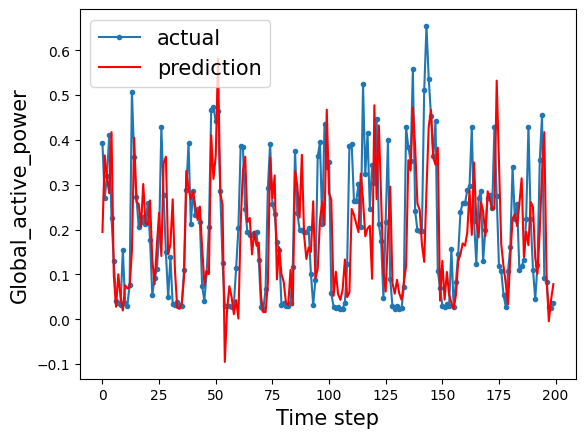

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, test_y[:200], marker='.', label="actual")
plt.plot(aa, pred_y[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

## LSTM

In [ ]:
# Making the Data 3D for LSTM
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17520, 1, 7) (17520,) (17068, 1, 7) (17068,)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 - 3s - 11ms/step - loss: 0.0150 - val_loss: 0.0102
Epoch 2/20
251/251 - 2s - 6ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 3/20
251/251 - 2s - 7ms/step - loss: 0.0102 - val_loss: 0.0084
Epoch 4/20
251/251 - 2s - 9ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 5/20
251/251 - 2s - 7ms/step - loss: 0.0101 - val_loss: 0.0084
Epoch 6/20
251/251 - 2s - 6ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 7/20
251/251 - 2s - 6ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 8/20
251/251 - 2s - 6ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 9/20
251/251 - 2s - 6ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 10/20
251/251 - 2s - 6ms/step - loss: 0.0100 - val_loss: 0.0082
Epoch 11/20
251/251 - 2s - 8ms/step - loss: 0.0099 - val_loss: 0.0083
Epoch 12/20
251/251 - 2s - 9ms/step - loss: 0.0099 - val_loss: 0.0082
Epoch 13/20
251/251 - 2s - 6ms/step - loss: 0.0099 - val_loss: 0.0083
Epoch 14/20
251/251 - 2s - 6ms/step - loss: 0.0099 - val_loss: 0.0082
Epoch 15/20
251/251 - 2s - 7ms/step - l

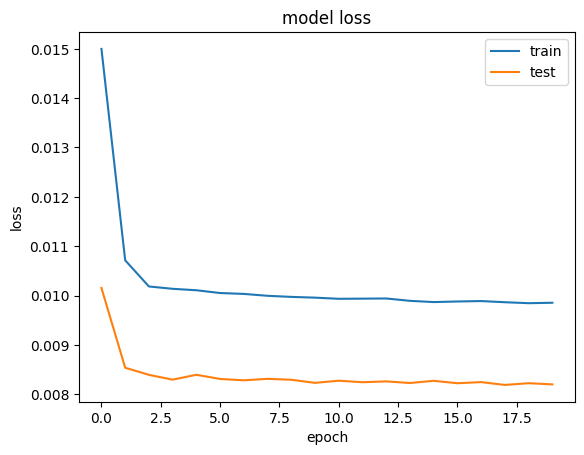

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test RMSE: 0.583


In [ ]:
test_X.shape

(17068, 7)

In [ ]:
mse = mean_squared_error(inv_y, inv_yhat)
rmse = np.sqrt(mse)
r2 = r2_score(inv_y, inv_yhat)
accuracy_percent = r2 * 100  # Convert R² to percentage

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Prediction Accuracy (approx.): {accuracy_percent:.2f}%")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.3397
Root Mean Squared Error (RMSE): 0.5828
R² Score: 0.4880
Prediction Accuracy (approx.): 48.80%


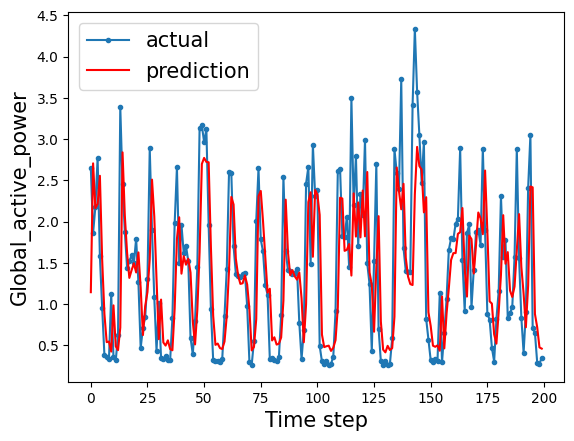

In [ ]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
model.save("lstm_model.keras")